In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie, JLD

In [2]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, chem_link, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - chem_link * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - chem_link * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [8]:
function output(idx, parameter, u0)
    println("index: $idx; chemical_link: $parameter");flush(stdout)
    println("u0: $u0");flush(stdout)
end
function output(Λ, u0)
    println("Λ: $Λ");flush(stdout)
    println("last point: $u0");flush(stdout)
end
function separate()
    println("----------------");flush(stdout)
    println("  ");flush(stdout)
end

separate (generic function with 1 method)

In [9]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;
electrical_link = 0.01

0.01

In [10]:
tf = 20000.0
tt = 20000.0
tstep = 0.01
integ_setting = (alg = Vern9(), adaptive = false, dt = 0.01);

In [16]:
# chemical link
start_p = -0.02
finish_p = 0.025
p_range = range(start_p, finish_p, length = 100);

In [17]:
Λs =  zeros(length(p_range), 6)
u0s = zeros(length(p_range), 6)

100×6 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0

In [18]:
for (idx, chemical) in enumerate(p_range)

    if idx == 1
        global u0 = SA[-2.5, 0.0, 0.0, -1.5, 0.0, 0.0]
    end

    output(idx, chemical, u0)

    p = SA[a, b, c, d, s, xr, r, I, xv, chemical, electrical_link]
    ds = ContinuousDynamicalSystem(HR,  u0, p)

    tr = trajectory(ds, 500.0, Δt = tstep; Ttr = tt, diffeq = integ_setting)
    u0 = tr[end]; ds = ContinuousDynamicalSystem(HR,  u0, p)
    Λ = lyapunovspectrum(ds, tf; diffeq = integ_setting)
    Λs[idx, :] = Λ
    u0s[idx, :] = u0
    
    output(Λs[idx, :], u0s[idx, :])
    separate()
    
end

index: 1; chemical_link: -0.02
u0: [-2.5, 0.0, 0.0, -1.5, 0.0, 0.0]
Λ: [0.0046042951164605, 0.0001128751827150842, -0.005595704097699914, -0.012725746159529065, -7.730591418938861, -9.768390127792314]
last point: [-0.9100580567375729, -3.2078501443040177, 4.02153916551849, -0.9055943802477914, -3.1914110446650947, 3.9995492074827372]
----------------
  
index: 2; chemical_link: -0.019545454545454546
u0: [-0.9100580567375729, -3.2078501443040177, 4.02153916551849, -0.9055943802477914, -3.1914110446650947, 3.9995492074827372]
Λ: [0.00407698036804845, 7.674194418297642e-5, -0.004390823938446672, -0.013388243274859647, -7.747324453427845, -9.76079421519762]
last point: [-1.1134007840013236, -4.998877429574704, 4.1169706898416605, -1.2127262662077067, -6.222106253472823, 3.9841704208946433]
----------------
  
index: 3; chemical_link: -0.019090909090909092
u0: [-1.1134007840013236, -4.998877429574704, 4.1169706898416605, -1.2127262662077067, -6.222106253472823, 3.9841704208946433]
Λ: [0.004

  
index: 19; chemical_link: -0.011818181818181818
u0: [-0.8777125884509217, -2.9725358866411646, 3.9985991383196575, -0.8840302744357097, -3.019751980379857, 4.000782002389844]
Λ: [0.003006066027173969, 0.001850985108259683, 2.0607892251817946e-5, -0.02291279524624722, -8.625607574360455, -8.882326575928621]
last point: [-0.24030213428823502, -0.1809306828519665, 3.648154047560922, -0.5517445721566748, -1.292254875560948, 3.618053553462837]
----------------
  
index: 20; chemical_link: -0.011363636363636364
u0: [-0.24030213428823502, -0.1809306828519665, 3.648154047560922, -0.5517445721566748, -1.292254875560948, 3.618053553462837]
Λ: [0.0029409042063319635, 0.0015586797880308835, -8.746617604333583e-5, -0.020756633127139622, -8.626127303784342, -8.889003097759726]
last point: [-1.1875407618641531, -5.891168636659123, 4.027009675515635, -1.1665782732871393, -5.626986692252587, 4.057531727726753]
----------------
  
index: 21; chemical_link: -0.01090909090909091
u0: [-1.187540761864153

----------------
  
index: 37; chemical_link: -0.0036363636363636364
u0: [-0.9577456383197391, -3.420602247016044, 4.228281128573378, -0.9276250665346496, -3.155864923747884, 4.240329029219323]
Λ: [0.0019949196162268824, 0.00014969288459403682, -0.001210421435625897, -0.010102582733960584, -8.44753988130557, -9.098128578352544]
last point: [-1.1985512752894982, -6.039089517962508, 4.003198818750123, -1.188100964583091, -5.912127492510307, 4.010846961378874]
----------------
  
index: 38; chemical_link: -0.003181818181818182
u0: [-1.1985512752894982, -6.039089517962508, 4.003198818750123, -1.188100964583091, -5.912127492510307, 4.010846961378874]
Λ: [0.0003638300012253378, -0.0019562593461136465, -0.0022579694695247345, -0.0034866189745108756, -8.455475194698211, -9.08610982278265]
last point: [-1.1038664524752166, -5.345837751143204, 3.6289440252138707, -1.1475007043073444, -5.786717367072344, 3.655188330726424]
----------------
  
index: 39; chemical_link: -0.0027272727272727275
u0: [

last point: [-1.2102276802890213, -6.1767104490163804, 4.000935418547025, -1.1904398212896412, -5.923829400350543, 4.027025874200665]
----------------
  
index: 55; chemical_link: 0.004545454545454545
u0: [-1.2102276802890213, -6.1767104490163804, 4.000935418547025, -1.1904398212896412, -5.923829400350543, 4.027025874200665]
Λ: [0.00024891935132093665, 0.00020741141609317796, -0.0006169075376874305, -0.005548906527089369, -8.446867069687757, -9.115617972797793]
last point: [0.8329576821541939, 0.15128472229498513, 4.1409777685167946, -0.12470424844999078, 0.34374182158216393, 4.070982921691032]
----------------
  
index: 56; chemical_link: 0.005
u0: [0.8329576821541939, 0.15128472229498513, 4.1409777685167946, -0.12470424844999078, 0.34374182158216393, 4.070982921691032]
Λ: [0.00022878309173115924, 0.00025026356083272507, -0.0007342967098789324, -0.005389623490708963, -8.443056648578683, -9.118181231134225]
last point: [-0.8968298881325902, -3.1042538909843995, 4.018855936506762, -0.91

Λ: [0.000147097897588062, -0.00216218088829697, -0.002614077386413567, -0.002831256318556157, -8.391254955146147, -9.160490465751032]
last point: [-1.1698358800020066, -6.021323219153726, 3.667815969794755, -1.18262632154565, -6.14066510485007, 3.6949900460454734]
----------------
  
index: 73; chemical_link: 0.012727272727272728
u0: [-1.1698358800020066, -6.021323219153726, 3.667815969794755, -1.18262632154565, -6.14066510485007, 3.6949900460454734]
Λ: [0.00010492776874973305, -0.0017480983080064697, -0.0030530845906613945, -0.003207494971934143, -8.389362814813895, -9.163824330202383]
last point: [-1.2336196054851492, -6.674007476928156, 3.7619056295113134, -1.232620077651649, -6.633815283260577, 3.7924165376289904]
----------------
  
index: 74; chemical_link: 0.013181818181818182
u0: [-1.2336196054851492, -6.674007476928156, 3.7619056295113134, -1.232620077651649, -6.633815283260577, 3.7924165376289904]
Λ: [0.00015585036214273894, -0.0015171688629143623, -0.003477557752415336, -0.0

u0: [-1.2030896864623726, -6.3949449756623, 3.673486190609814, -1.233125888412148, -6.66503979370462, 3.7654866140844625]
Λ: [0.006324836104560965, 0.00021398345683453548, -0.002245244746707255, -0.008301795746376656, -7.459150977671199, -10.045981853127435]
last point: [-0.5985062254250486, -1.3703271210422145, 3.8041938926816883, -0.7877087251781292, -2.4749382562524085, 3.824259872824094]
----------------
  
index: 91; chemical_link: 0.02090909090909091
u0: [-0.5985062254250486, -1.3703271210422145, 3.8041938926816883, -0.7877087251781292, -2.4749382562524085, 3.824259872824094]
Λ: [0.006249355394033267, 0.00108910392413506, -0.002269133477757715, -0.012423830881225138, -7.683461430375028, -9.804653219535652]
last point: [-1.1649311603112158, -5.597422647890337, 4.06927090704421, -1.2412251199638604, -6.55463825417904, 3.990951953749965]
----------------
  
index: 92; chemical_link: 0.021363636363636362
u0: [-1.1649311603112158, -5.597422647890337, 4.06927090704421, -1.2412251199638

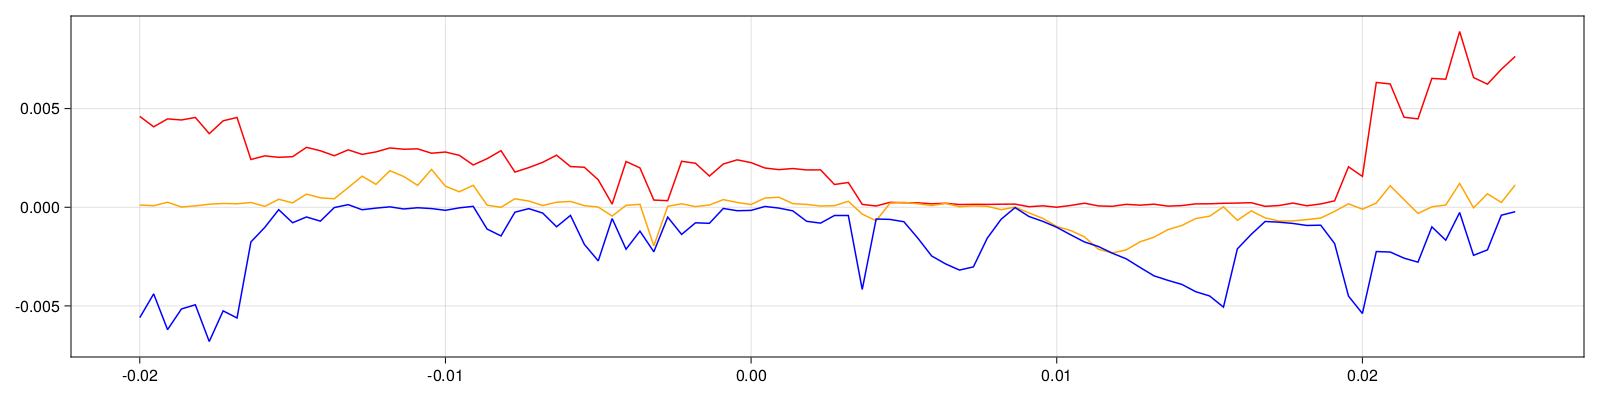

In [19]:
f = Figure(resolution = (1600, 400))
axis = Axis(f[1, 1])
lines!(axis, p_range, Λs[:, 1], color = :red)
lines!(axis, p_range, Λs[:, 2], color = :orange)
lines!(axis, p_range, Λs[:, 3], color = :blue)
f